# OpenCV

Before we jump into coding our own convolutional kernels/filters, we will introduce to a new library that will be useful to use when dealing with computer vision tasks, such as image classification: **OpenCV**

OpenCV is a computer vision and machine learning software library that includes many common image analysis algorithms that will help us build custom, intelligent computer vision applications. To start with, this includes tools that help us process images and select areas of interest. The library is widely used in academic and industrial applications; from [their site](http://opencv.org/about.html), OpenCV includes an impressive list of users. 

## Creating a Filter, Edge Detection

### Import resources and display image

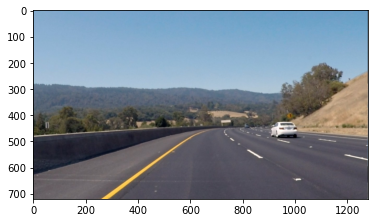

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('assets/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

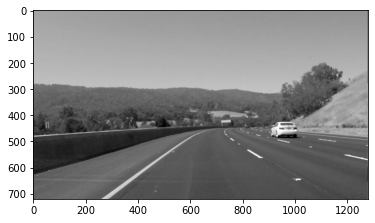

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="assets/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

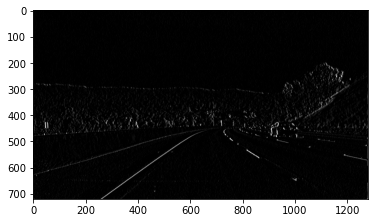

In [11]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images.



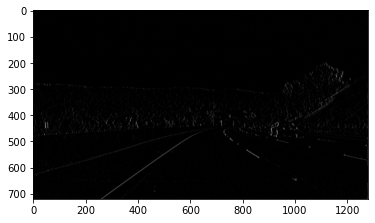

In [12]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y_decimal = np.array([[ -0.5, -0.9, -0.5], 
                   [ 0, 0, 0], 
                   [0.5, 0.9, 0.5]])

## TODO: Create and apply a Sobel x operator
sobel_x_decimal = np.array([[-0.5, 0, 0.5],
                   [-0.9, 0, 0.9],
                   [-0.5, 0, 0.5]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_decimal = cv2.filter2D(gray, -1, sobel_y_decimal)
filtered_image_decimal = cv2.filter2D(gray, -1, sobel_x_decimal)

plt.imshow(filtered_image_decimal, cmap='gray')

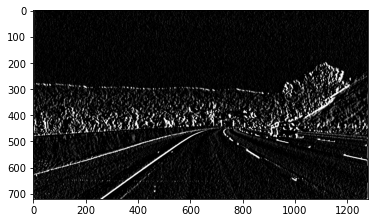

In [13]:
# Create a custom kernel

# 5x5 array for edge detection
sobel_y_5 = np.array([[-1, -2, -5, -2, -1],
                      [-0.5, -1, -1.5, -1, -0.5],
                      [0, 0, 0, 0, 0],
                      [0.5, 1, 1.5, 1, 0.5],
                      [1, 2, 5, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x_5 = np.array([[-1, -0.5, 0, 0.5, 1],
                      [-2, -1, 0, 1, 2],
                      [-5, -1.5, 0, 1.5, 5],
                      [-2, -1, 0, 1, 2],
                      [-1, -0.5, 0, 0.5, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_5 = cv2.filter2D(gray, -1, sobel_y_5)
filtered_image_5 = cv2.filter2D(gray, -1, sobel_x_5)

plt.imshow(filtered_image_5, cmap='gray')

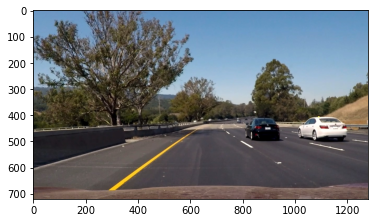

In [15]:
# Read in the image
image_trees = mpimg.imread('assets/bridge_trees_example.jpg')

plt.imshow(image)

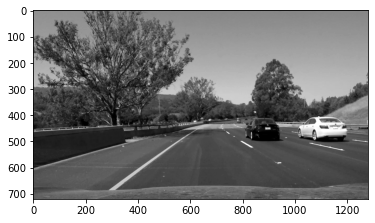

In [16]:
# Convert to grayscale for filtering
gray_trees = cv2.cvtColor(image_trees, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_trees, cmap='gray')

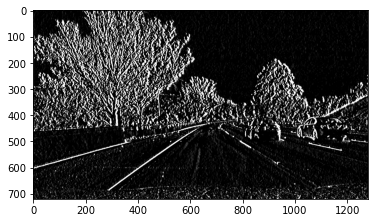

In [17]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_5 = cv2.filter2D(gray_trees, -1, sobel_y_5)
filtered_image_5 = cv2.filter2D(gray_trees, -1, sobel_x_5)

plt.imshow(filtered_image_5, cmap='gray')

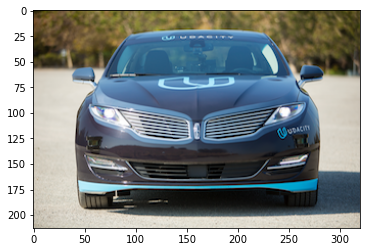

In [20]:
# Read in the image
image_car = mpimg.imread('assets/udacity_sdc.png')

plt.imshow(image_car)

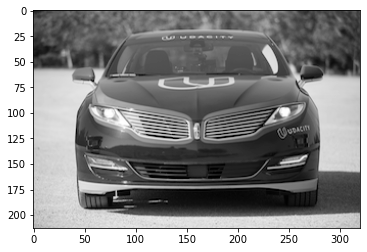

In [21]:
# Convert to grayscale for filtering
gray_car = cv2.cvtColor(image_car, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_car, cmap='gray')

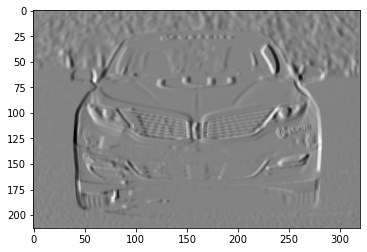

In [22]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_5 = cv2.filter2D(gray_car, -1, sobel_y_5)
filtered_image_5 = cv2.filter2D(gray_car, -1, sobel_x_5)

plt.imshow(filtered_image_5, cmap='gray')

## The importance of filters 

What we have just learned about different types of filters will be really important as we progress on deep learning, especially with CNNs. CNNs are a kind of deep learning model that can learn to do things like image classification and object recognition. They keep track of spatial information and learn to extract features like the edges of objects in something called a **convolutional layer**. Below we will see an simple CNN structure, made of multiple layers, below, including this "convolutional layer":

<img src="assets/LayersInCNNs.png">

## Convolutional layer

The convolutional layer is produced by applying a series of many different image filters, also known as convolutional kernels, to an input image. 

<img src="assets/4kernelsImage.png">

In the example shown, 4 different filters produce 4 differently filtered output images. When we stack these images, we form a complete convolutional layer with a depth of 4!

<img src="assets/AConvolutionalLayer.png">

## Learning

In the code above, we have been setting the values of filter weights explicitly, but neural networks will actually learn the best filter weights as they train on a set of image data. We will learn all about this type of neural network later, but know that high-pass and low-pass filters are what define the behavior of a network like this, and we know how to code those from scratch.

In practice, we will also find that many neural networks learn to detect the edges of images because the edges of object contain valuable information about the shape of an object.

Let's consider the image of a dog like this:

<img src="assets/Dog.png">

A single region in the image may have many different patterns that we want to detect. Consider the region of the dog's mouth for instance, that region has teeth, some whiskers, and a tongue. In that case, to understand this image we neeed filters for detecting all three of these characteristics. One for each of teeth, whiskers, and tongue. 

Recall the case of a single convolutional filter, adding another filter is probably exactly what we would expect. Where we just populate an additional collection of nodes in the convolutional layer. That collection has its own shared set of weights that differ from the weights for the first nodes. In fact, is common to have tens to hundreds of these collections in a convolutional layer, each corresponding to their own filter. Let's now execute some code to see what these collections look like. After all, each is formatted in the same way as an image, neamely as a matrix of values. 

# Convolutional Layer

We will visualize four filtered outputs (a.k.a. activation maps) of a convolutional layer. 

In this example, *we* are defining four filters that are applied to an input image by initializing the **weights** of a convolutional layer, but a trained CNN will learn the values of these weights.

<img src='assets/conv_layer.gif' height=60% width=60% />

So, say we are working with an image of Udacity's self-driving car as input.

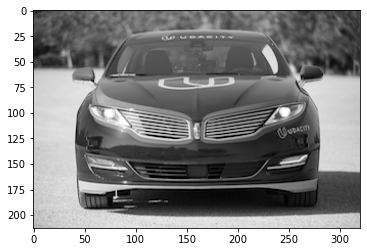

In [23]:
img_path = 'assets/udacity_sdc.png'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

Let's use four filters, each four pixels high and four pixels wide. 

<img src="assets/4filters.png">

Recall each filter will be convolved across the height and width of the image to produce an entire collection of nodes in the convolutional layer. In this case, since we have four filters, we will have four collections of nodes. In practice of for to each of these four collections is either feature maps or as activation maps. 

<img src="assets/activationMaps.png">


When we visualize these feature maps, we see that they look like filtered images. That is we have taken all of the complicated dense information in the original image and in each of these four cases outputted a much simpler image with less information. 

<img src="assets/CNNCar.png">

Be peeking at the structure of the filters, we can see that the first two filters discover vertical edges, where the last two detect horizontal edges in the image. Remember that lighter values and the feature map mean that the pattern in the filter was detected in the image. So can we match the lighter regions in each feature map with their corresponding areas in the original image?  

In the first activation map (from left to right) for instance, we can see a clear white line defining the right edge of the car. This is because all of the corresponding rregions in the car image closely resemble the filter. Where we have a vertical line of dark pixels to the left of a vertical line of lighter pixels. 

If we thing about it, we will notice that edges in images appear as a line of lighter pixels next to a line of darker pixels. The next image for instance contains many regions that would be discovered or detected by one of the four filters we defined before.

<img src="assets/FiltersDiscovered.png">

Filters that function as edge detectors are very important in CNNs and we will revisit them continuosly. 

So now we know hot to understand convolutional layers that have a grayscale images input. But, what about color images? Well, we have seen that grayscale images are interpreted by the computer as a 2D array with height and width. Color images are interpreted by the computer as a 3D array with height, width, and depth. In the case of RGB images, the depth is three. This 3D array is best conceptualized as a stack of three 2D matrices, where we have matrices corrresponding to the red, green, and blue channels of the image. 

So how do we perform a convolution on a color image? As was the case with grayscale images, we still move a filter horizontally and vertically across the image, only now the filter is itself three dimensional to have a value for each color channel at each horizontal and vertical location in the image array.

<img src="assets/3DMatrices.png">

Just as we think of the color image as a stack of three 2D matrices, we can also think of the filter as a stack of three 2D matrices. Both, the color image and the filter have red, greeen, and blue channels. 

Now to obtain the values of the nodes in the feature map corresponding to this filter, we do pretty much the same thing we did before. Only now, our sum is over three times as many terms. 

<img src="assets/CNN3D.png">

We emphasize that here we have depicted the calculation of the value of a single node in a convolutional layer for one filter on a color image. If we wanted to picture the case of a color image with multiple filters, instead of having a single 3D array which corresponds to one filter, we would define multiple 3D arrays, each defining a filter. 

<img src="assets/CNN3-3D.png">

Here we have depicteced three filters, each is a 3D array that you can think of as a stack of three 2D arrays.

Here is where it starts to get really cool. We can think about each of the feature maps in a convolutional layer along the same lines as an image channel and stack them to get a 3D array. Then, we can use this 3D array as input to still another convolutional layer to discover patterns within the patterns that we discovered in the first convolutional layer. We can then do this again to discover patterns within pattterns within patterns. 

<img src="assets/CNNsLayers.png">

Remember that in some sense, convolutional layers aren't too different from the dense layers that we saw in the previous notebook. Dense layers are fully connected meaning that the nodes are connected to every node in the previous layer. Convolutional layers are locally connected where their nodes are connected to only a small subset of the previous layers' nodes. Convolutional layers also had this added perimeter sharing. But in both cases, with convolutional and dense layers, inference works the same way. Both have weights and biases that are initially randomly generated. So in the case of CNNs where the weights take the form of convolutional filters, those filters are randomly generated and so are the patterns that they are initially designed to detect. 

As with MLPs, when we construct to CNN we will always specify a loss function. In the case of multiclass classification, this will be categorical cross-entropy loss. Then, as we train the model through backpropagation, the filters are updated at each epic to take on values that minimize the loss function. In other words, the CNN determines what kind of patterns it nees to detect based on the loss function. 

We will visualize these patterns later and see that for instance, if our dataset contains dogs, the CNNs is able to, on its own, learn filters that look like dogs. So, with CNNS to emphasize, we won't specify the values of the filters or tell the CNN what kind of patterns it needs to detect. These will be learned from the data.  

In [24]:
# Let's define our filters 
## Feel free to modify the numbers here, to try out another filter!
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [25]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


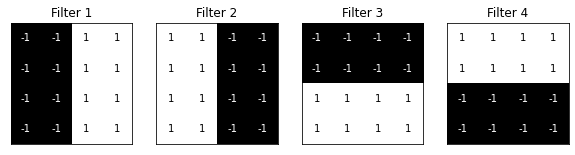

In [27]:
# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

## Define a convolutional layer 

The various layers that make up any neural network are documented, [here](http://pytorch.org/docs/stable/nn.html). For a convolutional neural network, we'll start by defining a:
* Convolutional layer

Initialize a single convolutional layer so that it contains all your created filters. Note that we are not training this network; we are initializing the weights in a convolutional layer so that we can visualize what happens after a forward pass through this network!


#### `__init__` and `forward`
To define a neural network in PyTorch, we define the layers of a model in the function `__init__` and define the forward behavior of a network that applyies those initialized layers to an input (`x`) in the function `forward`. In PyTorch we convert all inputs into the Tensor datatype, which is similar to a list data type in Python. 

Below, we will define the structure of a class called `Net` that has a convolutional layer that can contain four 4x4 grayscale filters.

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


### Visualize the output of each filter

First, we'll define a helper function, `viz_layer` that takes in a specific layer and number of filters (optional argument), and displays the output of that layer once an image has been passed through.

In [29]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

Let's look at the output of a convolutional layer, before and after a ReLu activation function is applied.

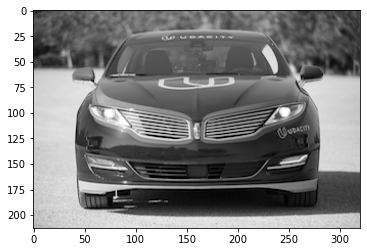

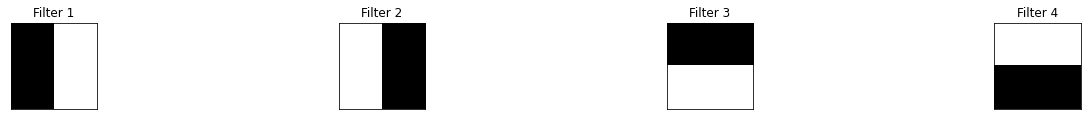

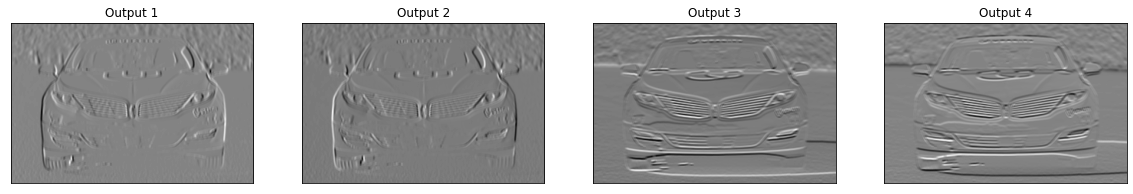

In [30]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

#### ReLu activation

In this model, we've used an activation function that scales the output of the convolutional layer. We've chose a ReLu function to do this, and this function simply turns all negative pixel values in 0's (black). See the equation pictured below for input pixel values, `x`. 

<img src='assets/relu_ex.png' height=50% width=50% />

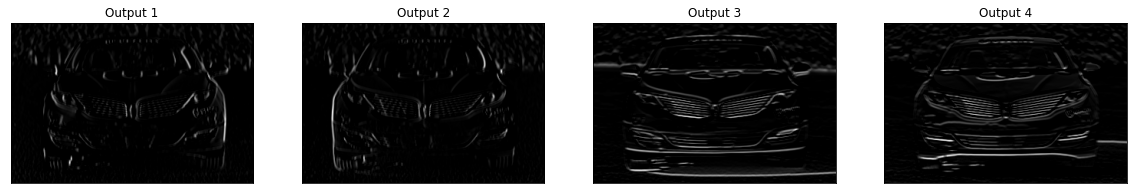

In [31]:
# after a ReLu is applied
# visualize the output of an activated conv layer
viz_layer(activated_layer)

## Optional resource

Check [this website](http://setosa.io/ev/image-kernels/) which allows to create your own filter. We can then use our webcam as input to a convolutional layer and visualize the corresponding activation map!